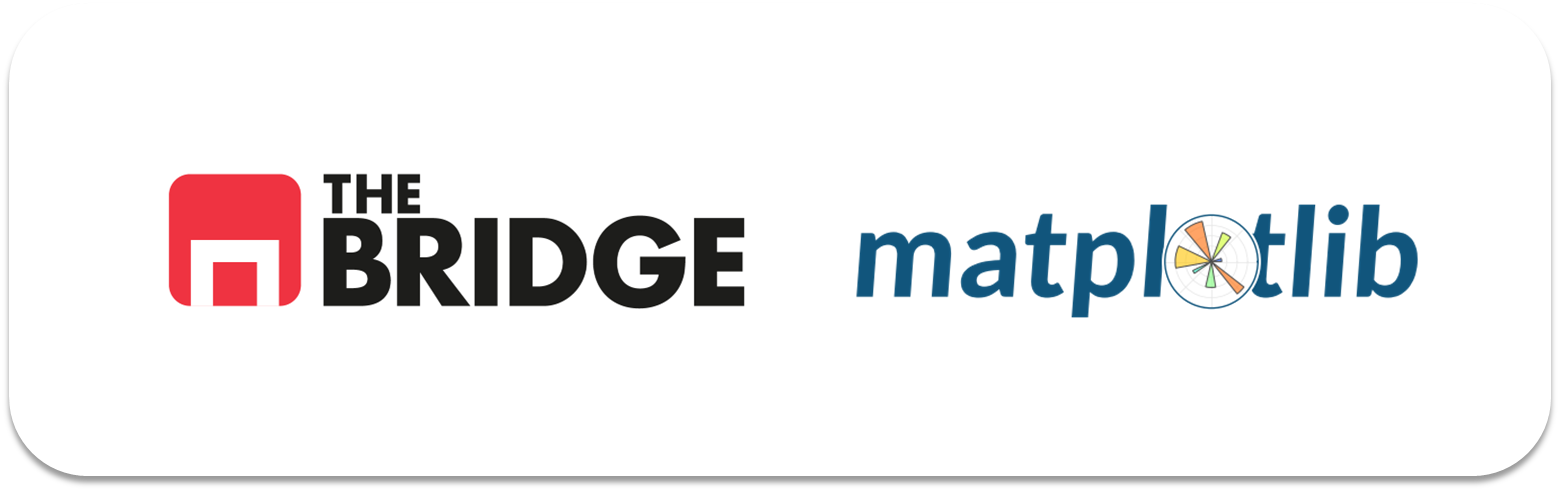

## PRACTICA OBLIGATORIA: **Visualización Básica**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use("seaborn-v0_8-whitegrid")

pd.options.mode.copy_on_write = True

### Ejercicio 1

#### #1.1

- Carga el dataset de casas de California que está en la ruta "./data/california_cities.csv".  
- Muestra parte de su contenido y su descripción.  
- Deshazte de las filas con nulos.

In [2]:
df_cities = pd.read_csv("data/california_cities.csv", index_col = 0)

In [3]:
df_cities.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                482 non-null    object 
 1   latd                482 non-null    float64
 2   longd               482 non-null    float64
 3   elevation_m         434 non-null    float64
 4   elevation_ft        470 non-null    float64
 5   population_total    482 non-null    int64  
 6   area_total_sq_mi    480 non-null    float64
 7   area_land_sq_mi     482 non-null    float64
 8   area_water_sq_mi    481 non-null    float64
 9   area_total_km2      477 non-null    float64
 10  area_land_km2       478 non-null    float64
 11  area_water_km2      478 non-null    float64
 12  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 52.7+ KB


In [4]:
df_cities.head(10)

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57
7,AmadorCity,38.419444,-120.824167,280.0,919.0,185,0.314,0.314,0.000,0.813,0.813,0.000,0.00
8,AmericanCanyon,38.168056,-122.252500,14.0,46.0,19454,4.845,4.837,0.008,12.548,12.527,0.021,0.17
9,Anaheim,33.836111,-117.889722,48.0,157.0,336000,50.811,49.835,0.976,131.600,129.073,2.527,1.92


In [5]:
df_cities.isna().sum().sort_values(ascending=False)

elevation_m           48
elevation_ft          12
area_water_percent     5
area_total_km2         5
area_water_km2         4
area_land_km2          4
area_total_sq_mi       2
area_water_sq_mi       1
city                   0
latd                   0
longd                  0
area_land_sq_mi        0
population_total       0
dtype: int64

In [6]:
df = df_cities.copy()

In [7]:
df = df.dropna()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 427 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                427 non-null    object 
 1   latd                427 non-null    float64
 2   longd               427 non-null    float64
 3   elevation_m         427 non-null    float64
 4   elevation_ft        427 non-null    float64
 5   population_total    427 non-null    int64  
 6   area_total_sq_mi    427 non-null    float64
 7   area_land_sq_mi     427 non-null    float64
 8   area_water_sq_mi    427 non-null    float64
 9   area_total_km2      427 non-null    float64
 10  area_land_km2       427 non-null    float64
 11  area_water_km2      427 non-null    float64
 12  area_water_percent  427 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 46.7+ KB


#### #1.2  

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro.  

Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center" o investigar como funciona bar_label). Los colores de las barras deben tener un 50% de transparencia y ser: azul, gris, rojo, aceituna y marrón.  

2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Arial", tamaño = 14, peso = "Bold", color azul acero o "steelblue")
3. El scatter de área de agua de un ciudad con su poblacion. Transparencia al 50% y color verde.
4. El boxplot de la altura de las ciudades.

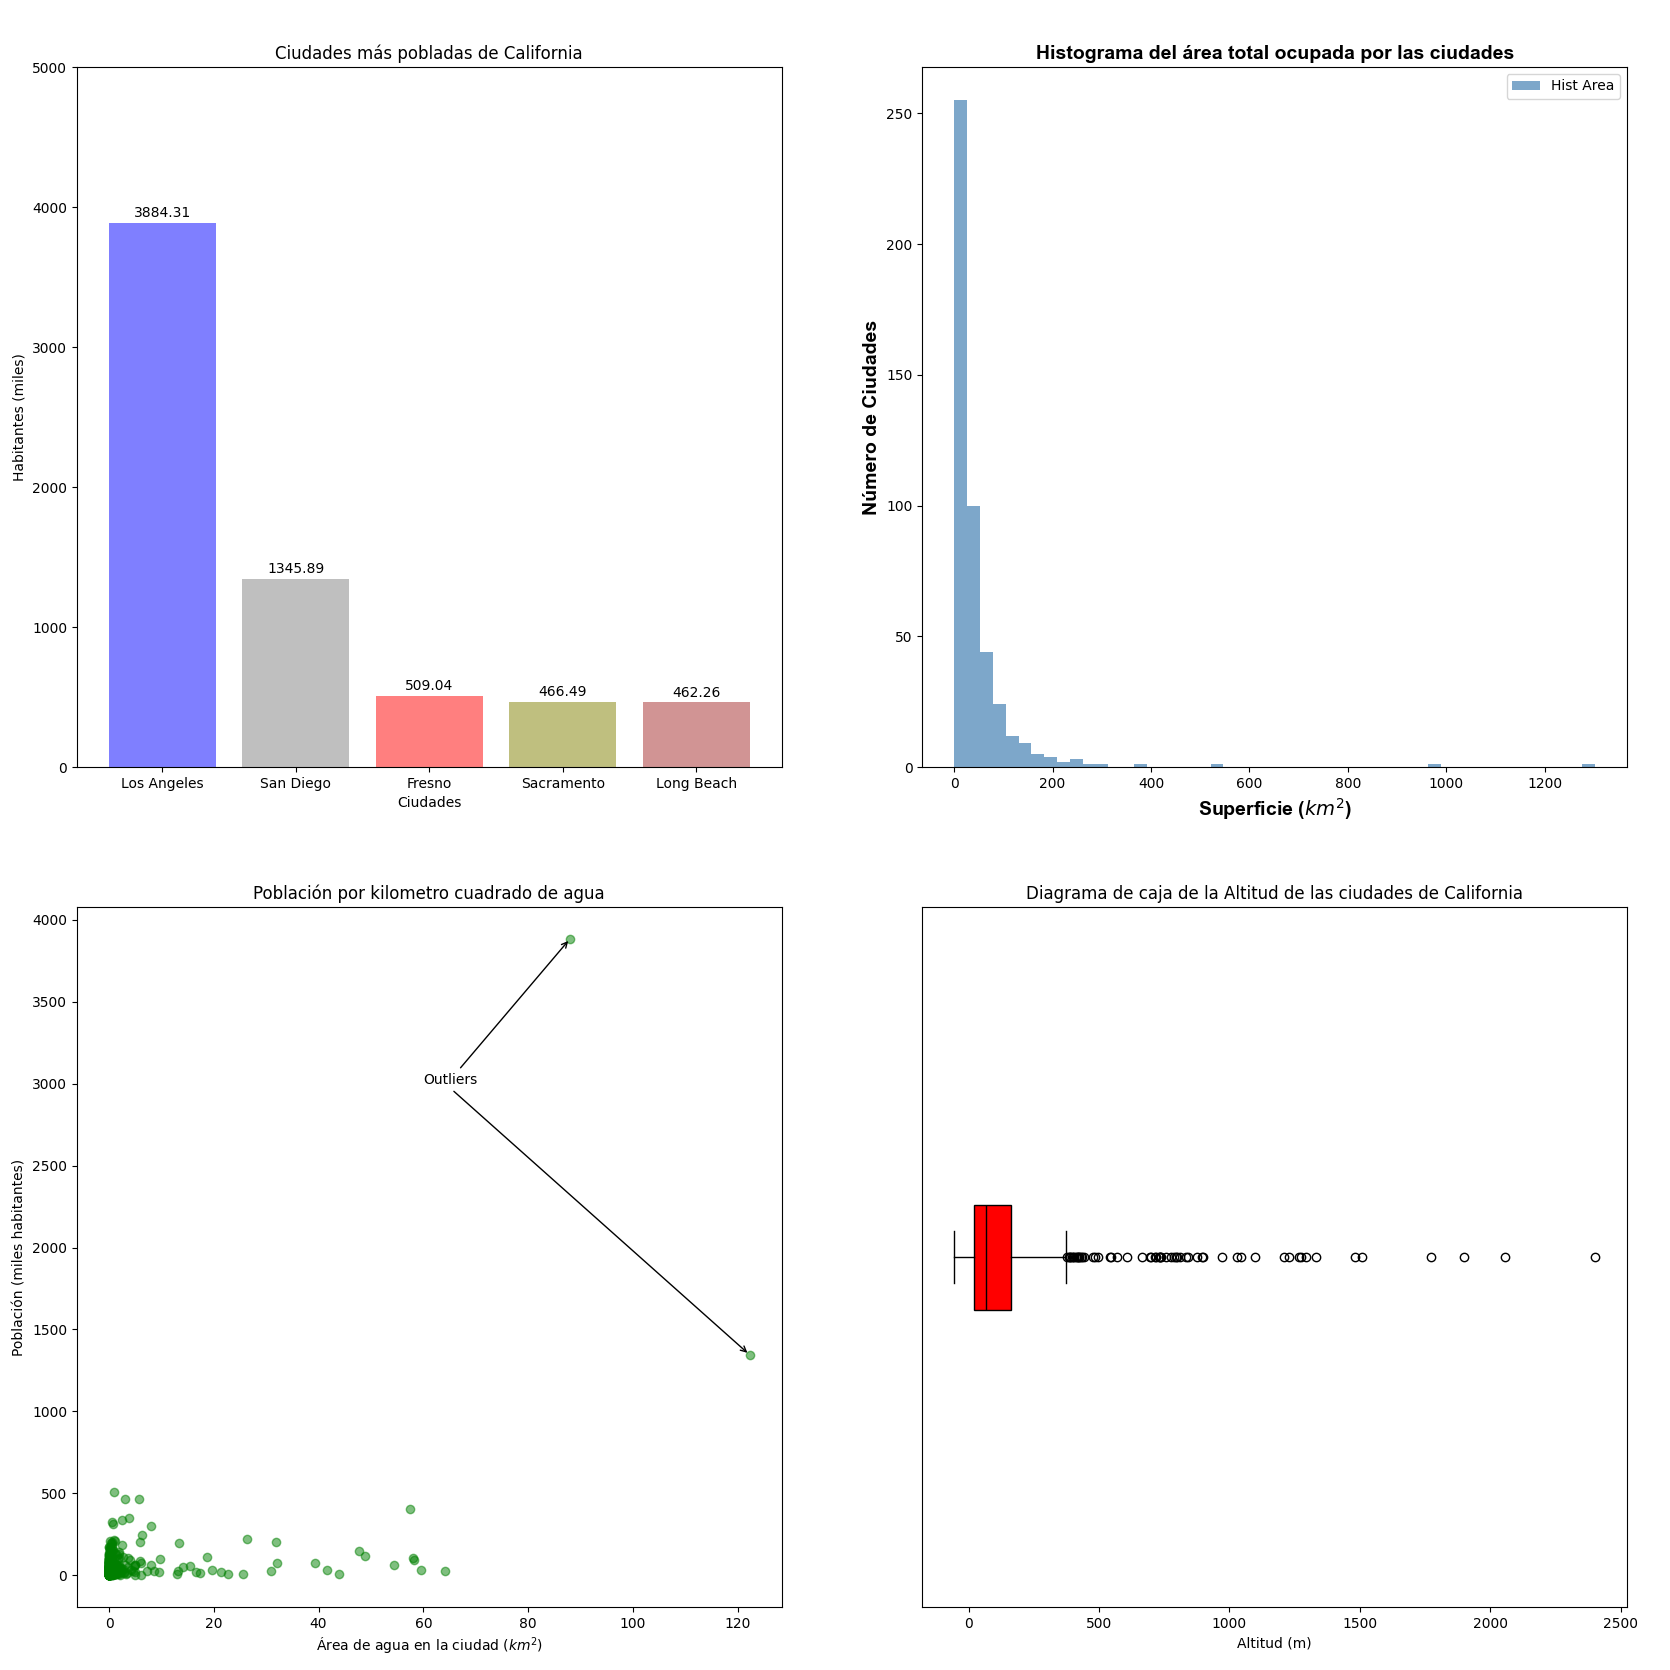

1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center" o investigar como funciona bar_label). Los colores de las barras deben tener un 50% de transparencia y ser: azul, gris, rojo, aceituna y marrón.  

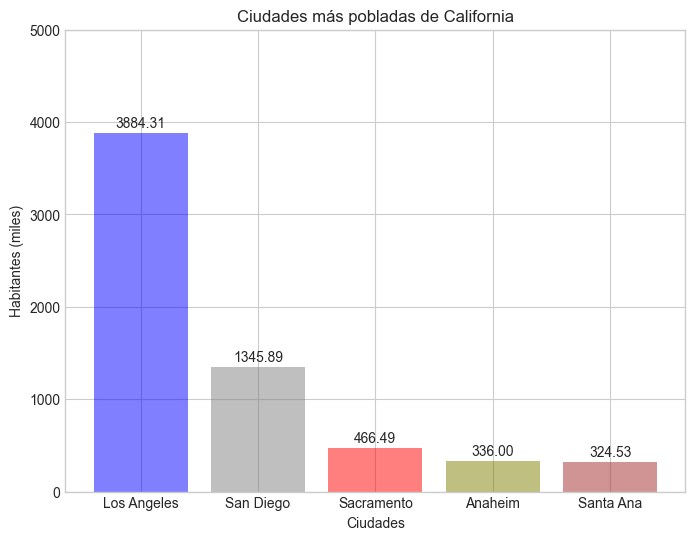

In [9]:

# Este lo saque de la practica ya hecha, ya que no me quedaba muy claro
def separa_nombre(nombre):
    nuevo = nombre[0]
    for letra in nombre[1:]:
        if letra == letra.upper():
            nuevo += " "
        nuevo += letra
    return nuevo


df_ciudades_mas_pobladas = df[["city","population_total"]].nlargest(5, columns="population_total").copy()
df_ciudades_mas_pobladas = df_ciudades_mas_pobladas.set_index("city")

ciudades = [separa_nombre(ciudad) for ciudad in df_ciudades_mas_pobladas.index]

colores = ["blue","gray","red","olive","brown"]


plt.figure(figsize=(8,6))

container = plt.bar(x= ciudades, 
                    height= df_ciudades_mas_pobladas["population_total"]/1000,
                    color= colores,
                    alpha= 0.5)

plt.ylim([0,5000])
plt.ylabel("Habitantes (miles)")
plt.xlabel("Ciudades")
plt.title("Ciudades más pobladas de California")

plt.bar_label(container, # Necesitamos guardar previamente el plot en un container
              fmt="{:.2f}",
              padding=2)

# # Otra posibilidad, más complicada:
# for indice, ciudad in enumerate(df_ciudades_mas_pobladas.index):
#     poblacion = df_ciudades_mas_pobladas.loc[ciudad, "population_total"]/1000
#     plt.text(ciudades[indice], poblacion + 50, f"{poblacion}", ha = "center")

plt.show()

- Me arrojo otros datos, entiendo que pudo ser el dropna pero lo quisiera ver en el live 

2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Arial", tamaño = 14, peso = "Bold", color azul acero o "steelblue")

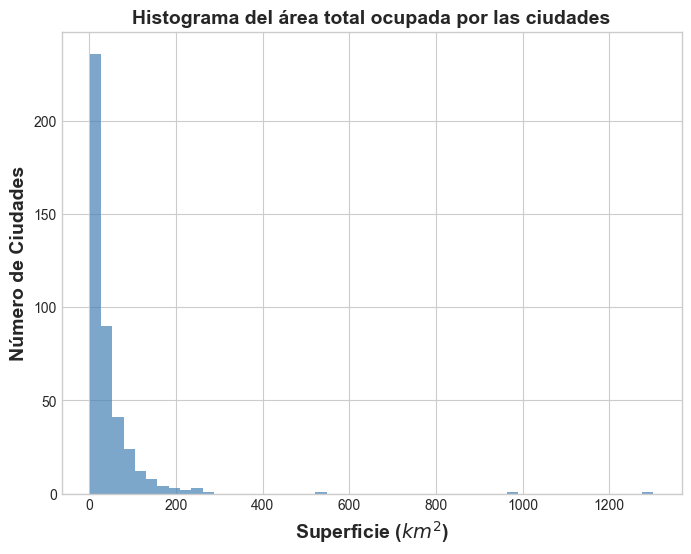

In [10]:
plt.figure(figsize=(8,6))

plt.hist(df["area_total_km2"],
         color= "steelblue",
         bins = 50,
         alpha = 0.7, #con este se ve la transparencia osea el matiz del color
         label = "Hist Area"
        );

fontdict = dict(family="Arial", size= 14, weight="bold")


plt.title("Histograma del área total ocupada por las ciudades", fontdict=fontdict) #tiene caracteres especiales(buscar)
plt.xlabel("Superficie ($km^2$)", fontdict=fontdict)
plt.ylabel("Número de Ciudades", fontdict=fontdict)

plt.show()


3. El scatter de área de agua de un ciudad con su poblacion. Transparencia al 50% y color verde.

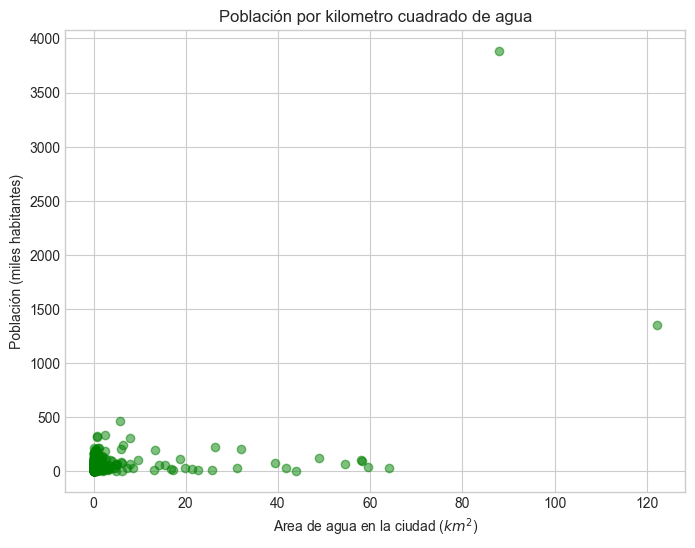

In [11]:
# Aqui mostramos el plot

plt.figure(figsize=(8,6))

plt.scatter(x= df["area_water_km2"],
            y= df["population_total"]/1000,
            alpha= 0.5,
            color= "green")
               

#Todas sus etiquetas
plt.title("Población por kilometro cuadrado de agua")
plt.xlabel("Area de agua en la ciudad ($km^2$)")
plt.ylabel("Población (miles habitantes)")

plt.show()

4. El boxplot de la altura de las ciudades.

In [12]:
df

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
5,AlisoViejo,33.575000,-117.725556,127.0,417.0,47823,7.472,7.472,0.000,19.352,19.352,0.000,0.00
6,Alturas,41.487222,-120.542500,1332.0,4370.0,2827,2.449,2.435,0.014,6.342,6.306,0.036,0.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


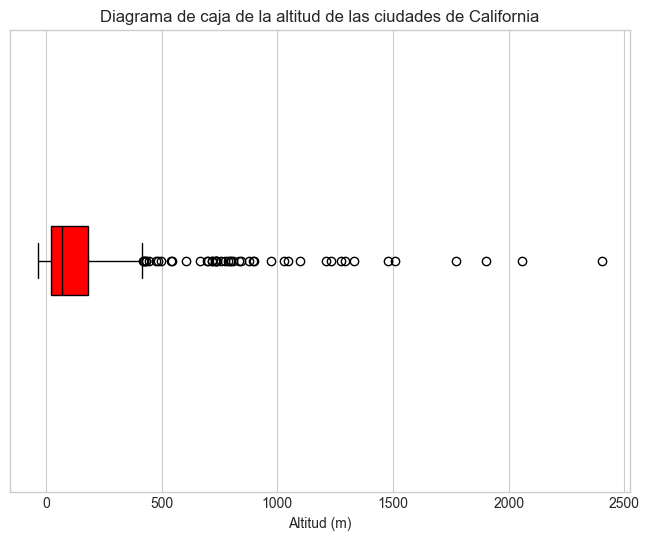

In [13]:
plt.figure(figsize=(8,6))

plt.boxplot(df["elevation_m"], 
            vert = False,
            patch_artist= True, # Sin patch_artist=True no nos aceptará las ediciones posteriores
            boxprops = dict(facecolor = "red"),
            medianprops = dict(color= "black"));


plt.title("Diagrama de caja de la altitud de las ciudades de California")
plt.xlabel("Altitud (m)")
plt.yticks([]) # Con yticks podemos quitar el ticker del eje y (el 1 que salía por defecto)

plt.show()

- ### Unimos todas las graficas

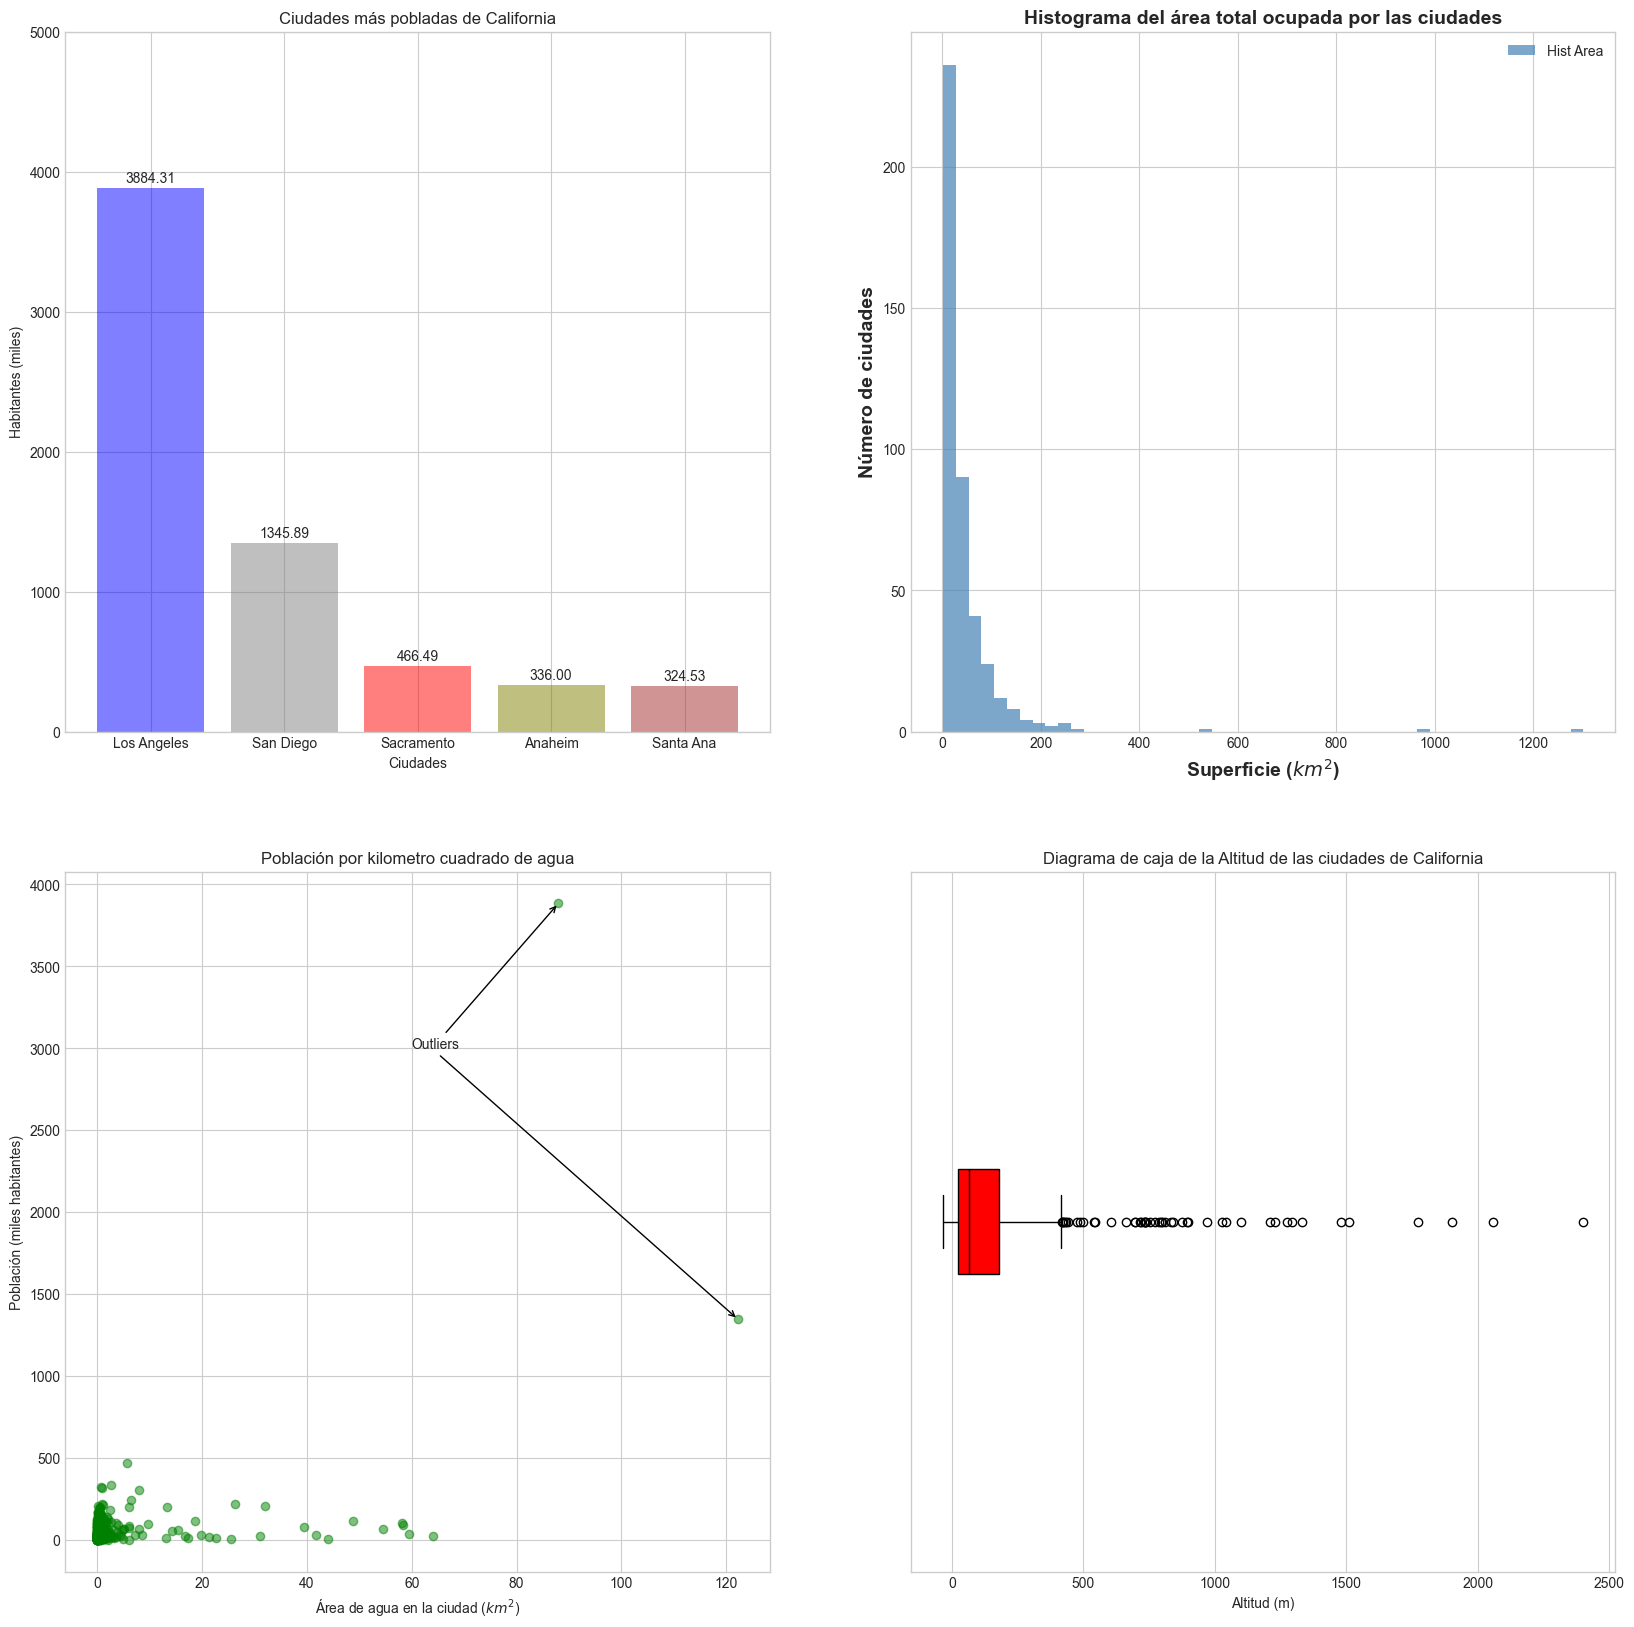

In [16]:

fig = plt.figure(figsize=(20,20))

# Primera figura
plt.subplot(2,2,1)

df_ciudades_mas_pobladas = df[["city","population_total"]].nlargest(5, columns="population_total").copy()
df_ciudades_mas_pobladas = df_ciudades_mas_pobladas.set_index("city")

ciudades = [separa_nombre(ciudad) for ciudad in df_ciudades_mas_pobladas.index]
colores = ["blue","gray","red","olive","brown"]

container = plt.bar(x= ciudades,
                    height= df_ciudades_mas_pobladas["population_total"]/1000, 
                    color = colores, 
                    alpha = 0.5)

plt.ylim([0,5000])
plt.ylabel("Habitantes (miles)")
plt.xlabel("Ciudades")
plt.title("Ciudades más pobladas de California")

plt.bar_label(container,
              fmt="{:.2f}",
              padding=2)

# figura 2
plt.subplot(2,2,2)

plt.hist(df["area_total_km2"],
         color = "steelblue",
         alpha = 0.7,
         bins = 50,
         label = "Hist Area")

fontdict = dict(family="Arial", size= 14, weight="bold")

plt.xlabel("Superficie ($km^2$)", fontdict = fontdict)
plt.ylabel("Número de ciudades", fontdict= fontdict)
plt.title("Histograma del área total ocupada por las ciudades", fontdict= fontdict)
plt.legend()

# figura 3
plt.subplot(2,2,3)

plt.scatter(df["area_water_km2"], 
            df["population_total"]/1000, 
            alpha = 0.5, 
            color = "green")

plt.xlabel("Área de agua en la ciudad ($km^2$)")
plt.ylabel("Población (miles habitantes)")
plt.title("Población por kilometro cuadrado de agua")

outlier_1_y = df_ciudades_mas_pobladas["population_total"].nlargest(2).iloc[0]
outlier_2_y = df_ciudades_mas_pobladas["population_total"].nlargest(2).iloc[1]
outlier_1_x = df.loc[df["population_total"] == outlier_1_y,"area_water_km2"].values[0]
outlier_2_x = df.loc[df["population_total"] == outlier_2_y,"area_water_km2"].values[0]

xytext= (60,3000)
text = "Outliers"

plt.annotate(xy= (outlier_1_x,outlier_1_y/1000), 
             xytext= xytext, 
             text= text, 
             arrowprops= dict(arrowstyle = "->"))

plt.annotate(xy= (outlier_2_x,outlier_2_y/1000), 
             xytext= xytext, 
             text= " " * len(text), 
             arrowprops= dict(arrowstyle = "->"))

# figura 4
plt.subplot(2,2,4)

plt.boxplot(df["elevation_m"],
            vert= False, 
            patch_artist= True,
            boxprops = dict(facecolor= "red"), 
            medianprops = dict(color= "black"))

plt.xlabel("Altitud (m)")
plt.title("Diagrama de caja de la Altitud de las ciudades de California")
plt.yticks([])

plt.show()

#### #1.3

Graba la figura en un archivo .png y sube el archivo a tu repositorio personal junto con el notebook.

In [17]:
fig.savefig("practica_obligatoria.png")